In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
data=pd.read_csv(r'C:\Users\Ishan\Desktop\diaretdb0_v_1_1\resources\images\diaretdb0_groundtruths\image130.dot',sep=' ',header=None)

In [70]:
import glob

In [71]:
path = r'C:\Users\Ishan\Desktop\diaretdb0_v_1_1\resources\images\diaretdb0_groundtruths' # use your path
all_files = glob.glob(path + "\*.dot")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None,sep=' ')
    li.append(df)

frame = pd.concat(li, axis=0,sort=False)

In [72]:
frame.head()

,0,1,2,3,4
0,redsmalldots,hemorrhages,hardexudates,NaN,NaN
0,redsmalldots,hemorrhages,hardexudates,NaN,NaN
0,redsmalldots,hemorrhages,hardexudates,softexudates,NaN
0,redsmalldots,hemorrhages,hardexudates,NaN,NaN
0,redsmalldots,hemorrhages,hardexudates,softexudates,NaN


In [73]:
frame.columns=['redsmalldots','haemorrhages','hardexudates','softexudates','neovascularisation']

In [74]:
frame.head()

,redsmalldots,haemorrhages,hardexudates,softexudates,neovascularisation
0,redsmalldots,hemorrhages,hardexudates,NaN,NaN
0,redsmalldots,hemorrhages,hardexudates,NaN,NaN
0,redsmalldots,hemorrhages,hardexudates,softexudates,NaN
0,redsmalldots,hemorrhages,hardexudates,NaN,NaN
0,redsmalldots,hemorrhages,hardexudates,softexudates,NaN


In [75]:
frame=frame.notnull().astype('int')

In [76]:
frame.head()

,redsmalldots,haemorrhages,hardexudates,softexudates,neovascularisation
0,1,1,1,0,0
0,1,1,1,0,0
0,1,1,1,1,0
0,1,1,1,0,0
0,1,1,1,1,0


In [77]:
cols = frame.columns.tolist()

In [78]:
cols

['redsmalldots',
 'haemorrhages',
 'hardexudates',
 'softexudates',
 'neovascularisation']

In [80]:
cols=cols[0:2]+[cols[3]]+[cols[2]]+[cols[4]]

In [81]:
cols

['redsmalldots',
 'haemorrhages',
 'softexudates',
 'hardexudates',
 'neovascularisation']

In [108]:
data=frame[cols]

In [109]:
data.head()

,redsmalldots,haemorrhages,softexudates,hardexudates,neovascularisation
0,1,1,0,1,0
0,1,1,0,1,0
0,1,1,1,1,0
0,1,1,0,1,0
0,1,1,1,1,0


In [110]:
intensity=data.values.dot(1 << np.arange(data.values.shape[-1]))

In [156]:
def getclass(i):
    if i==1:
        return 1
    elif(2<=i<=12):
        return 2
    elif(13<=i<=32):
        return 3
    else:
        return 0

In [157]:
classes=[]
for i in intensity:
    classes.append(getclass(i))


In [158]:
data=data.drop("class",axis='columns')

In [159]:
data.insert(loc=5,column='class',value=classes)

In [160]:
str(10).zfill(3)

'010'

(array([22.,  0.,  0., 17.,  0.,  0., 46.,  0.,  0., 45.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

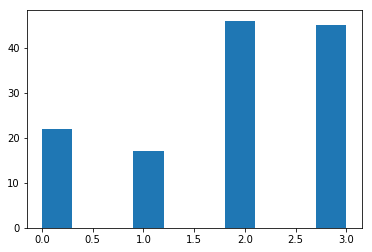

In [161]:
plt.hist(data['class'])

In [167]:
data.to_csv(r'C:\Users\Ishan\Desktop\diaretdb0_v_1_1\labels.csv',index=None,encoding='utf-8')